In [8]:
# stores.pynb   - Data visualisation and analysis of the store-item data.

# Objective   - Predict the next three months of sales

# Data source -  'https://www.kaggle.com/c/demand-forecasting-kernels-only/data'

# Author      -  Adil Khan


In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

## Load data


In [4]:
df=pd.read_csv('train.csv')

num_rows=len(df)
num_cols = len(df.columns)

#Rename 'date' and 'sales' to 'ds' and 'y' (important for fbprophet to work)

#convert date to datetime and set to index
df['ds'] = pd.to_datetime(df['date'])
# del df['date']
df = df.set_index('ds',drop=False)
df['y']=df['sales']

#Specifiy number of columns for pandas to output
pd.set_option("display.max_columns",60)

#Specifiy number of rows for pandas to output
pd.set_option("display.max_rows",num_rows)

df.sample(5)

,date,store,item,sales,ds,y
ds,,,,,,
2016-01-06,2016-01-06,6,17,20,2016-01-06,20
2015-11-27,2015-11-27,1,43,51,2015-11-27,51
2016-02-20,2016-02-20,9,21,46,2016-02-20,46
2017-01-24,2017-01-24,5,35,31,2017-01-24,31
2015-02-21,2015-02-21,8,48,45,2015-02-21,45


## How many sales of each item at each store?

In [7]:
stores = []
store_sales = []
array = np.zeros([10,50])
store_total = []

#Group by store and item
for name, group in df.groupby(df.store):
    stores.append(name)
    store_total.append(np.sum(group.sales))
    for name_, group_ in group.groupby(group.item):
        array[int(name)-1,int(name_)-1] = int(np.sum(group_.sales))

#Write values to a dictionary
dic={}
for i,column in enumerate((row for row in array.T)):
    dic[(i+1)]=(column)
dic['Store']=stores

#Create dataframe
item_sales = pd.DataFrame(dic).set_index('Store')

#Calculate totals for stores and items
item_sales['Store Total']=store_total
item_totals = [np.sum(item_sales[i]) for i in item_sales.columns]
item_sales.loc['Item Total']=item_totals
item_sales[['Store Total']+list(np.arange(1,51))]

,Store Total,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4315603.0,36468.0,97050.0,60638.0,36440.0,30335.0,96889.0,96383.0,126856.0,84918.0,121163.0,115436.0,115465.0,139067.0,97050.0,145497.0,42605.0,54729.0,139407.0,66972.0,78318.0,66058.0,132899.0,48334.0,109560.0,132816.0,78949.0,36613.0,145289.0,115196.0,66317.0,96793.0,72744.0,114592.0,42500.0,108638.0,126560.0,48251.0,133927.0,72483.0,48286.0,36525.0,60451.0,84439.0,48561.0,132788.0,96495.0,36181.0,84993.0,48319.0,108360.0
2,6120128.0,51445.0,137528.0,85808.0,51557.0,42985.0,136850.0,137057.0,180939.0,119563.0,171822.0,163080.0,163154.0,197031.0,137607.0,205569.0,60167.0,77730.0,197422.0,94623.0,111346.0,94507.0,188096.0,68601.0,154813.0,188856.0,111575.0,51747.0,205677.0,162466.0,94633.0,137455.0,103635.0,163083.0,60425.0,154594.0,180355.0,68218.0,188533.0,102556.0,68604.0,51255.0,86494.0,120124.0,68997.0,188774.0,137351.0,51471.0,120568.0,68862.0,154520.0
3,5435144.0,45778.0,121985.0,76274.0,45862.0,38086.0,122355.0,121699.0,159807.0,106797.0,152266.0,144786.0,144407.0,175688.0,122052.0,183373.0,53215.0,68937.0,175462.0,83730.0,99049.0,83915.0,167710.0,60970.0,137231.0,167699.0,98960.0,45816.0,182862.0,145499.0,83902.0,122295.0,91372.0,144490.0,53122.0,136262.0,160247.0,61063.0,167758.0,91616.0,61297.0,45630.0,76322.0,106269.0,60963.0,167720.0,121882.0,45870.0,107188.0,60732.0,136874.0
4,5012639.0,41886.0,112692.0,70389.0,42156.0,35653.0,111880.0,112528.0,147577.0,98684.0,140689.0,134030.0,133486.0,161792.0,112768.0,169186.0,49625.0,63092.0,161604.0,77488.0,91341.0,77230.0,154542.0,56126.0,126212.0,155251.0,91121.0,42202.0,169001.0,133743.0,77584.0,111950.0,84111.0,133989.0,49304.0,125940.0,147955.0,56125.0,154433.0,84303.0,55794.0,42305.0,70374.0,98638.0,56519.0,154639.0,112153.0,42207.0,98176.0,56315.0,125851.0
5,3631016.0,30566.0,81236.0,50828.0,30634.0,25722.0,81375.0,81322.0,106941.0,70917.0,101361.0,96742.0,96868.0,117587.0,82010.0,122319.0,35405.0,45773.0,117011.0,56067.0,66371.0,55678.0,112095.0,40809.0,91568.0,111752.0,66386.0,30610.0,122307.0,96368.0,56129.0,81619.0,60728.0,97065.0,35878.0,91634.0,106941.0,40700.0,112022.0,60682.0,40372.0,30733.0,50636.0,71512.0,40930.0,112166.0,81686.0,30493.0,71728.0,40851.0,91883.0
6,3627670.0,30527.0,81319.0,50783.0,30593.0,25369.0,81264.0,81438.0,106612.0,72054.0,101462.0,96836.0,96545.0,117457.0,81468.0,121737.0,35821.0,45757.0,116363.0,55664.0,66095.0,56285.0,111442.0,40622.0,92228.0,112051.0,66024.0,30694.0,121357.0,97238.0,55996.0,81496.0,61067.0,96180.0,35895.0,91248.0,107482.0,40961.0,111967.0,60933.0,40501.0,30325.0,50933.0,71277.0,40761.0,111647.0,81330.0,30510.0,71310.0,40503.0,92243.0
7,3320009.0,27681.0,74351.0,46620.0,28044.0,23252.0,74325.0,74336.0,98100.0,65557.0,93412.0,88366.0,88650.0,106908.0,74907.0,111640.0,32419.0,41678.0,107270.0,51457.0,60717.0,51513.0,102299.0,36965.0,83530.0,102984.0,60291.0,27780.0,111576.0,88594.0,51274.0,74894.0,56001.0,88260.0,32834.0,84085.0,97792.0,36976.0,101927.0,55895.0,37241.0,28251.0,46446.0,64688.0,37335.0,102084.0,74553.0,28265.0,65050.0,37262.0,83674.0
8,5856169.0,49272.0,130845.0,82309.0,49208.0,40953.0,131396.0,130980.0,172486.0,115391.0,164008.0,156118.0,156386.0,189575.0,130747.0,197295.0,57537.0,73571.0,189576.0,90290.0,105992.0,90667.0,180618.0,65721.0,148284.0,181221.0,107044.0,49383.0,196867.0,155633.0,89876.0,131431.0,98613.0,155840.0,57940.0,147620.0,172312.0,65786.0,180679.0,98140.0,65728.0,49368.0,82433.0,115002.0,66091.0,180667.0,131481.0,49576.0,114558.0,65800.0,147855.0
9,5025976.0,42593.0,112833.0,70365.0,42272.0,35191.0,112139.0,112869.0,148431.0,98797.0,140794.0,133606.0,134038.0,161622.0,112223.0,170069.0,49298.0,63451.0,161803.0,77765.0,91196.0,77742.0,154960.0,56390.0,126845.0,155460.0,91543.0,42678.0,169430.0,133641.0,77693.0,112489.0,84735.0,133590.0,49437.0,127047.0,148724.0,56329.0,154559

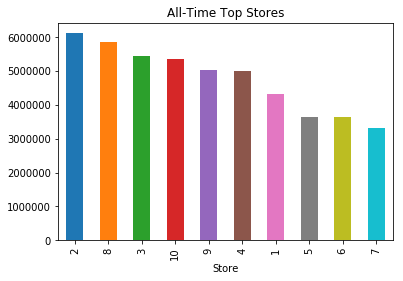

In [8]:
top_stores = (item_sales.sort_values(by='Store Total',ascending=False)['Store Total'])
top_stores.drop(top_stores.index[0]).plot.bar(title='All-Time Top Stores');

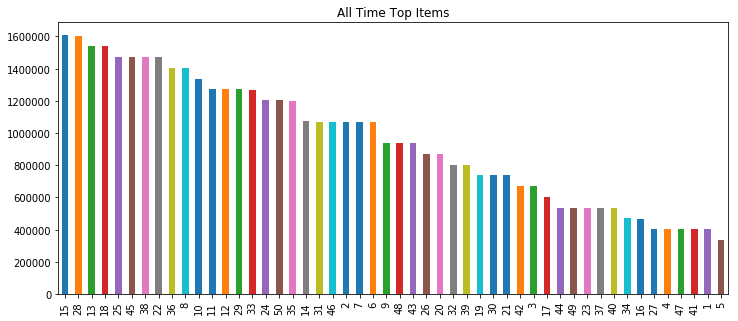

In [9]:
top_items = item_sales.sort_values(by='Item Total',axis=1,ascending=False).loc['Item Total']
top_items.drop(top_items.index[0]).plot.bar(title = 'All Time Top Items',figsize = (12,5));

There are 10 stores and 50 products. Store 2 had the most sales, 84% more than Store 7 which performed the worst.

The bar chart 'All Time Top Items' reveal that products fall into brackets. For example, items 14,31,46,2,7,6 have sold in similar quantities.

We cannot say that one item has performed better than another because price information was not given.

## How do sales for each item at each store vary over time?

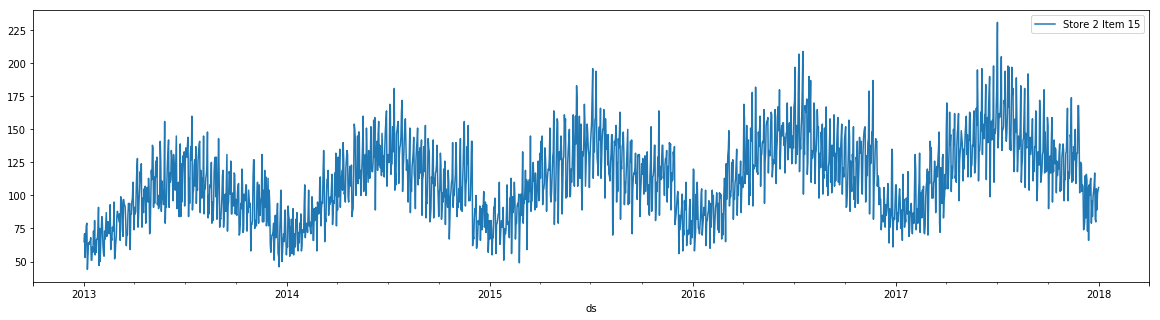

In [10]:

def sales_graph(store,item):
    df.query('store==%d & item==%d'% (store,item))['sales'].plot(
                                            figsize=(20,5),
                                            label= 'Store %d Item %d' %(store,item),
                                            legend = True,    )
    

sales_graph(store = 2,item = 15)


The function 'sales_graph' allows us to quickly visualise how a certain product at certain store have changed over time.

We can also compare:
 - how the same product has done at multiple stores
 - how multiple products have done at one store

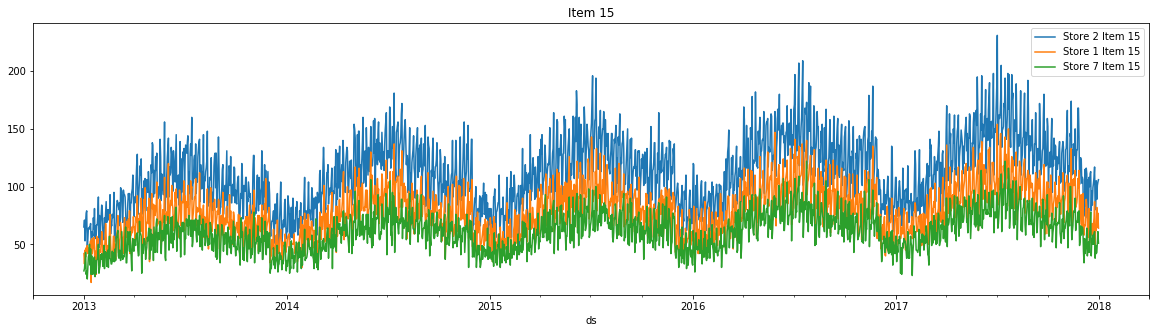

In [12]:
sales_graph(store = 2,item = 15)
sales_graph(store = 1,item = 15)
sales_graph(store = 7,item = 15)
plt.title('Item 15');

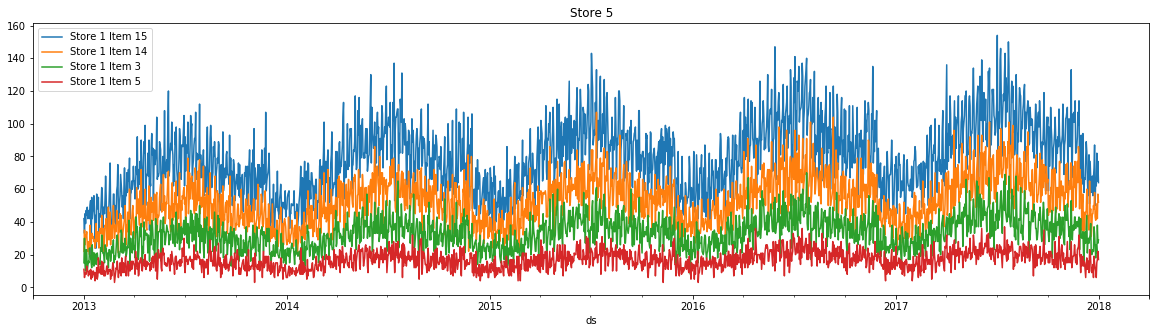

In [13]:
sales_graph(store = 1,item = 15)
sales_graph(store = 1,item = 14)
sales_graph(store = 1,item = 3)
sales_graph(store = 1,item = 5)
plt.title('Store 5');

We can clearly see that there is a seasonal and overall trend for most, if not all, products
It appears that sales tend to increase in July and drop in December. There may be an overall trend for sales to increase.

## Can we use fbprophet to make predictions?

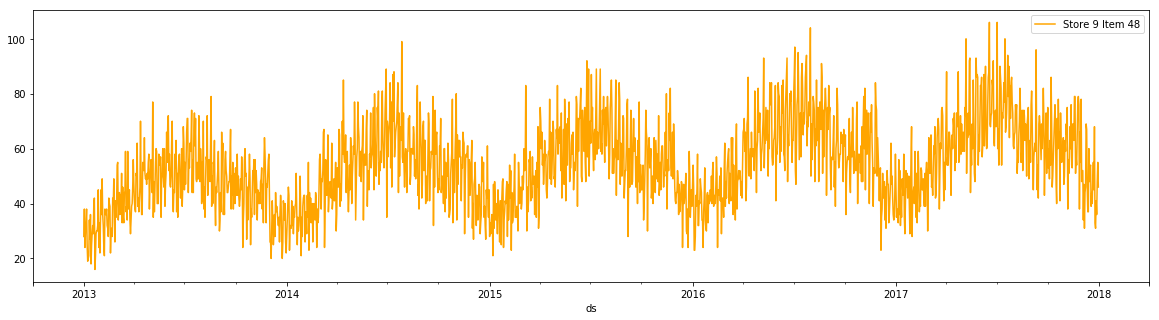

In [15]:
#Generate forecast_data for Store 10, Item 15

store =9
item =  48

forecast_data = df.query('store==%d & item==%d'% (store,item))


forecast_data['y'].plot(figsize=(20,5),
                   label= 'Store %d Item %d' %(store,item),
                   color='orange',
                   legend = True);

In [16]:
#Try to predict the year 2017

m = Prophet(interval_width=0.90)
m.fit(forecast_data.loc[:'2016'])
future = m.make_future_dataframe(periods=365, freq='d')
fb_forecast = m.predict(future)#
forecast = fb_forecast.set_index('ds')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Adil/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


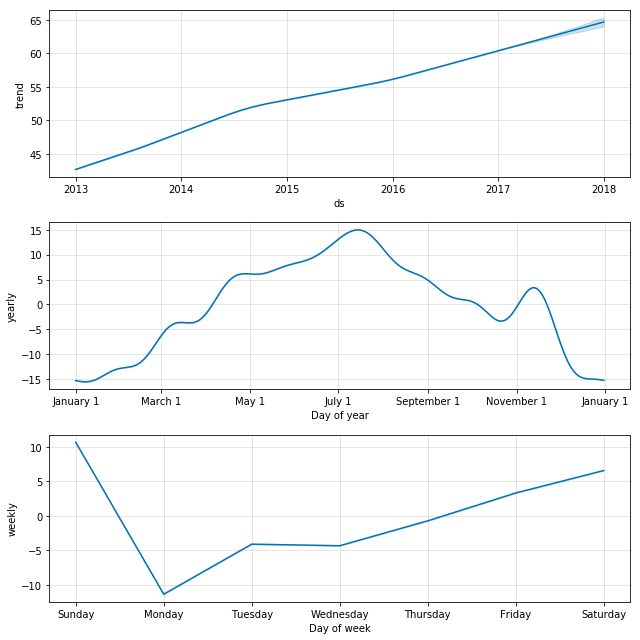

In [17]:
m.plot_components(fb_forecast);

As hypothesised, the overall trend is for sales to increase, with a season peak in July.
There also seems to be a weekly trend, with more sales on the weekend.

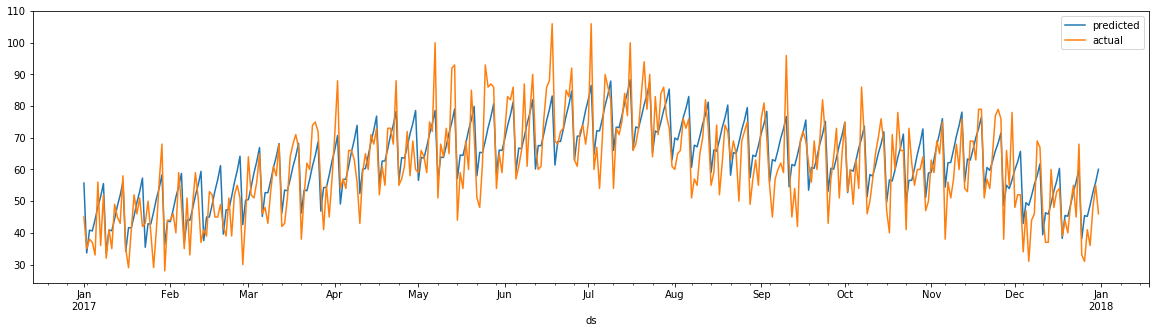

In [18]:
forecast['yhat']['2017'].plot(label='predicted',legend=True, figsize = (20,5));
forecast_data.loc['2017']['y'].plot(label='actual',legend=True,figsize = (20,5));

In [19]:
#Calculate error

actual = np.asarray(forecast['yhat']['2017'])
predicted = np.asarray(forecast_data.loc['2017']['y'])
error = np.sqrt(np.sum(abs(predicted-actual)))
total_sales =  np.sum(actual)

print('Incorrect:\t%d \nTotal Actual\t%d\nError\t\t%f' % (error,total_sales,error/total_sales))


Incorrect:	49 
Total Actual	22841
Error		0.002184


Graphically, the two plots for 2017 seem to agree with eachother. 

The error was calculated by summing the absolute differences between actual and predicting and dividing this by the total number of actual sales.

For most Store/Item pairs, this error is less than 1%.

We can find the total error and try to tune the model accordingly.

## Make 2017 predictions for 50 store/item pairs

In [20]:
interval_width = 0.9

ERROR = []

for i in tqdm([10,20,30,40,50]):
    
    item = i
    _ERROR = []
    
    for s in range(1,11):
        
        try:

            #Pull data
            store = s      
            forecast_data = df.query('store==%d & item==%d'% (store,item))

            #Create model
            m = Prophet(interval_width=interval_width, daily_seasonality=False)
            m.fit(forecast_data.loc[:'2016'])
            future = m.make_future_dataframe(periods=365, freq='d')
            fb_forecast = m.predict(future)
            forecast = fb_forecast.set_index('ds')

            #Calculate error for 2017
            actual = np.asarray(forecast['yhat']['2017'])
            predicted = np.asarray(forecast_data.loc['2017']['y'])
            error = np.sqrt(np.sum(abs(predicted-actual)))
            total_sales =  np.sum(actual)
            _error = error/total_sales
            _ERROR.append(_error)
            
        except:
            
            _ERROR.append(np.nan)
            
    ERROR.append(_ERROR)
    
print('Mean error:',round(np.mean(ERROR),5))
print('Std dev   :',round(np.std(ERROR),5))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

/Users/Adil/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Mean error: 0.00252
Std dev   : 0.00072


The year 2017 was predicted and compared for 10x5 cases. The mean error was 0.3% with a standard deviation of 0.1%. This is much more accurate than expected. Testing on the test set will show how accurate the algorithm really is.

## Predict first 90 days of 2018

In [5]:
interval_width = 0.9

yhat = []

for i in tqdm(range(1,51)):
    
    item = i
    
    for s in range(1,11):
        
        try:
            #Pull data
            store = s      
            forecast_data = df.query('store==%d & item==%d'% (store,item))

            #Create model
            m = Prophet(interval_width=interval_width, daily_seasonality=False)
            m.fit(forecast_data.loc[:])
            future = m.make_future_dataframe(periods=90, freq='d')
            fb_forecast = m.predict(future)
            forecast = fb_forecast.set_index('ds')

            #Append 90 day prediction
            yhat.append(list(forecast.tail(90)['yhat']))
            
        except:
            yhat.append(np.nan)
            print('ERROR. Item', i, 'Store', s)
             

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

/Users/Adil/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
answer = []

for i in yhat:
    for j in i:
        answer.append(int(j))

df_out = pd.DataFrame({'id':np.arange(0,len(answer)),
                       'sales':answer})

df_out.to_csv('submission.csv',index=False)
